# An Introduction to Data Analysis with Python

```
Prepared for Participants of JALT 2023

Chris Pirotto
Senior Lecturer, Fukui University of Technology
chris.pirotto@gmail.com

Daniel Cook
Assistant Professor of Foreign Language, Fukui University of Technology
cook.r.dan@gmail.com
```

*This notebook is publicly hosted for viewing [here](https://1dancook.github.io/JALT2023-Intro-to-Data-Analysis-with-Python/).*

*The notebook and other assets are located [here](https://github.com/1dancook/JALT2023-Intro-to-Data-Analysis-with-Python).*

<!-- toc -->

# Introduction

This Jupyter Notebook has been written and designed to introduce researchers in the field of TESOL to powerful tools that can be used for data analysis.

In order to introduce these tools and what they are capable of, we present a walkthrough of a research project that should be familiar to the audience. We hope this provides less friction involved with understanding the tools introduced.

The Notebook is meant to be read from top-to-bottom. We will first introduce you to common tools used in data analysis, then walk through a typical workflow of importing data, inspecting it, cleaning it, and finally analyzing it.

We understand that you may not have experience with programming - that is okay! Python is quite an intuitive programming language. We have tried to provide examples that are fairly simple and also show some intermediate uses here and there. In some cases complex parts are broken down into a series of small steps.

From Daniel: I have to give a huge amount of credit to the many of the authors of the resources found at the end. The majority of this has been written from knowledge gained over years of working with Python and my gleanings from the documentation for Pandas and matplotlib.

Enjoy and happy coding!

# Tools for Data Analysis

The tools that we will use are Python, pandas, and Jupyter notebooks. The following is a very brief introduction to each of these.

## A *very* short introduction to Python

Python is a high-level, versatile, and easy-to-read programming language. It's known for its simplicity and readability, making it a popular choice for beginners and experienced developers alike. 

There are many programming languages and some have very special use cases. Keep in mind that a programming language is only an interface between you (the programmar) and the computer.

Essentially, with any programming language, we are telling the computer what to do.

The following is a simple code snipper. It has a comment that is essentially ignored by the computer, and a statement that would be executed. This tells the computer to print "Hello, World" to the screen.

In [1]:
# Comments start with a hash
print(f"Hello, World!")

Hello, World!


### Why use Python for Data Analysis?

There are a great number of software tools for data analysis with a number of similarities between them. We're not advocating one tool over another, but simply want to say that **it's best to use the tool that suites your needs**. That being said, wouldn't it be interesting if you could make your own tools? Utilizing a programming language gives you the opportunity to do just that.

Here are some other reasons we think using Python is great:

- open source and free
- compared to other programming languages it's easier to learn
- widely used in the fields of data science (another noteable choice is `R`)
- your process can be documented and repeatable from start to finish
- great ecosystem of tools and libraries
- a skill to add to your resume
- code and results are testable (See **Appendix 1**)
- code projects are easily scalable
- you can apply programming skills to *many*, *many* other things

## A *very* short introduction to Pandas

Pandas is a popular *Python library* for data manipulation and analysis. It provides easy-to-use data structures and functions to work with structured data, such as tables and spreadsheets. Pandas simplifies tasks like data cleaning, filtering, and statistical analysis, making it a cornerstone of data science and analysis in Python.

Pandas is a popular *Python library* for data manipulation and analysis. It provides easy-to-use data structures and functions to work with structured data, such as tables and spreadsheets. Pandas simplifies tasks like data cleaning, filtering, and statistical analysis, making it a cornerstone of data science and analysis in Python.

If you have experienced using a spreadsheet, you will know that it is a table that holds data. Pandas uses a similar structure to hold data, and it is called a `DataFrame`. Dataframes have a number of attributes and methods that are at the core of using the library.

You can do all of the things you would expect to do with such a structure: sorting, filtering, grouping, selecting, and etc.

![An Example DataFrame](assets/example_dataframe.svg)

Another important data structure that Pandas uses is called a `Series`. If might be helpful to think of this as a single column from a `DataFrame` but it also has an index.

![A Pandas Series](assets/example_series.svg)

## A *very* short introduction to Jupyter Notebooks

![jupyterlab](assets/jupyterlab.png)

*Picture Credit: jupyter.org*

Python and Pandas can be used in a number of contexts like scripts, but for the purpose of data analysis, someone created this wonderful tool called Jupyter Notebooks.

What is a notebook? From the [Jupyter documentation](https://docs.jupyter.org/en/latest/):

> A notebook is a shareable document that combines computer code, plain language descriptions, data, rich visualizations like 3D models, charts, graphs and figures, and interactive controls. A notebook, along with an editor (like JupyterLab), provides a fast interactive environment for prototyping and explaining code, exploring and visualizing data, and sharing ideas with others.

With notebooks you break your work into cells. A cell can contain code, Markdown, or raw text. Users can run code cells to see immediate results, making it an ideal tool for experimenting, documenting, and presenting data analysis and research in a collaborative and reproducible way.

Each cell takes input, and then depending on the contents, produces output. Since you can see immediate results, it is an ideal tool for experimenting, documenting, and presenting data analysis and research.

It also helps the process of your analysis or research to be reproducible from start to finish.

### Some Example Cells:

In [2]:
print("Hello JALT")

Hello JALT


Even though cells appear separate, they exist in the same namespace. If you define a variable `a` in one cell, it can be used or overwritten in another. The notebook will evaluate the cell if you have a variable, function, or object on the last line, it will be used for output:

In [3]:
a = "I eat pizza"
a 

'I eat pizza'

We can reuse/change variables from other cells that have been executed. Let's add something else to the variable that we made above:

In [4]:
a = a + " every. single. day. 🍕😜"
a

'I eat pizza every. single. day. 🍕😜'

Now that you've had a brief introduction to some of these tools, let's put them to use.

# Our Research Project

In order to demonstrate how these tools can be used in a common research workflow, we created a research project. We made something that should be familiar to anyone doing research in the field of TESOL.

**The Research Question:**

```text
Does incorporating pizza-related content into language learning materials positively impact English as a Foreign Language (EFL) learners' language acquisition, motivation, and confidence?
```

To test this theory, we can explore how the number of hours exposed to material correlates with motivation and confidence.

**Some details about the data:**

- We used a Pre/Post Test for language skills with treatment being self-study exposure to pizza-related materials
- Confidence and motivation are measured by Likert values (1: "Very Low", 2: "Low", 3: "Medium", 4: "High", 5: "Very High")
- Total test score for both tests was 100
- Students were expected to spend between 0 and 50 hours on the material given the timeframe
- There were two forms used for our research (pre and post) which resulted in two excel files that we will use.

**The data for this project is stored in two excel files:**

1. pre_pizza_material.xlsx
2. post_pizza_material.xlsx

# Getting the Data into Python

To analyze the data that we collected, we first need to import `pandas`. It's common to give pandas an alias of `pd`:

In [2]:
import pandas as pd

## Loading Data

You can load data from various sources, such as CSV files, Excel spreadsheets, databases, or web APIs. Pandas reads the data and makes a `DataFrame`.

Dataframes are kind of like spreadsheets - they have rows and columns. They also contain other important information about the data.

This is how we can load an excel file into a `DataFrame` that will be assigned to a variable `pre_df`:

In [3]:
pre_df = pd.read_excel("pre_pizza_material.xlsx")

We can see the top 5 rows by using a method called `head()`:

In [4]:
pre_df.head()

,ID Number,Name,Last Name,Age,Sex,yrs_eflexp,favorite_topping,pineapple,exp_pzmat,score,motivation,confidence
0,91600124,John,Smith,18,Male,13,Pepperoni,y,n,71,2,2.0
1,91600185,Olivia,Johnson,19,Female,9,Sausage,y,n,45,2,3.0
2,91600140,James,Brown,19,Male,14,Onions,y,n,33,2,2.0
3,91600145,Emma,Williams,19,Female,10,Olives,n,n,62,1,2.0
4,91600173,William,Jones,18,Male,11,Green Peppers,n,n,56,1,1.0


We can do the same process for the post-material data into a variable `post_df`:

In [5]:
post_df = pd.read_excel("post_pizza_material.xlsx")
post_df.head()

,ID Number,hrs_pzmat,score,motivation,confidence,favorite_topping
0,91600124,25,82,3,2,Pineapple
1,91600185,14,76,2,5,Pineapple
2,91600140,20,68,2,3,Pineapple
3,91600145,11,90,1,4,Pineapple
4,91600173,18,78,4,4,Pineapple


## Merging the two Dataframes

We now have two dataframes that we need to merge together. Conceptually, this is what happens:

![pd_merge](assets/pd_merge.svg)

We will use Pandas' `merge()` method to merge the two dataframes on the `ID Number` column. Some of the other column names are the same, and when that happens pandas will automatically add suffixes. We want specific suffixes so we will instruct the method to use `_pre` and `_post`.

We will assign the merged dataframe to a variable **`df`** which will be used throughout the rest of the notebook. The variable name could be anything, but it's common to use `df`.

In [6]:
df = pd.merge(
    pre_df, post_df,
    on="ID Number",
    suffixes=("_pre", "_post"),
    validate="one_to_one"
)

# Let's see it!
df.head()

,ID Number,Name,Last Name,Age,Sex,yrs_eflexp,favorite_topping_pre,pineapple,exp_pzmat,score_pre,motivation_pre,confidence_pre,hrs_pzmat,score_post,motivation_post,confidence_post,favorite_topping_post
0,91600124,John,Smith,18,Male,13,Pepperoni,y,n,71,2,2.0,25,82,3,2,Pineapple
1,91600185,Olivia,Johnson,19,Female,9,Sausage,y,n,45,2,3.0,14,76,2,5,Pineapple
2,91600140,James,Brown,19,Male,14,Onions,y,n,33,2,2.0,20,68,2,3,Pineapple
3,91600145,Emma,Williams,19,Female,10,Olives,n,n,62,1,2.0,11,90,1,4,Pineapple
4,91600173,William,Jones,18,Male,11,Green Peppers,n,n,56,1,1.0,18,78,4,4,Pineapple


# Handling a Dataframe

We now have a **dataframe** and it is crucial to learn how to view and select different parts of the data. We may also want to change columns and save it. This section gives an overview of some of the methods to do so.

## Inspecting the Dataframe

Apart from `head()`, Pandas has some convenient ways to get an overview of the data.

A dataframe has a `shape` attribute that gives the number of rows and columns:

In [7]:
df.shape

(72, 17)

A dataframe's `describe()` method will generate descriptive statistics *all* numeric columns.

Usually it will print out long float values, but we can round it to two decimal places using `round()`.

In [8]:
round(df.describe(), 2)

,ID Number,Age,yrs_eflexp,score_pre,motivation_pre,confidence_pre,hrs_pzmat,score_post,motivation_post,confidence_post
count,72.00,72.00,72.00,72.00,72.00,71.00,72.00,72.00,72.00,72.00
mean,91600158.50,19.54,9.83,48.11,1.94,2.27,25.79,75.86,3.85,3.26
std,20.93,1.32,2.69,16.67,0.98,0.72,69.36,12.89,1.03,1.29
min,91600123.00,18.00,5.00,11.00,1.00,1.00,2.00,34.00,1.00,1.00
25%,91600140.75,19.00,7.75,34.00,1.00,2.00,13.75,66.75,3.00,2.00
50%,91600158.50,19.00,10.00,48.50,2.00,2.00,16.00,76.00,4.00,3.50
75%,91600176.25,20.25,12.00,61.25,3.00,3.00,24.00,85.25,5.00,4.00
max,91600194.00,22.00,14.00,79.00,5.00,4.00,603.00,99.00,5.00,5.00


If you spend a few moments looking at the result of `describe()`, you may have some questions:

1. Why do all columns except one have a *count* of 72?
2. Why is the max of *hrs_pzmat* 603?

Another method, `info()`, is used to list the columns. It will show the column index (**#**), **Column**, the **Non-Null Count**, and **Dtype**.

**Dtype** is the data type of the column. With our data, some columns will be *int64* (integers) or *float64* (floats), but most are *object* because they contained strings.

At the bottom of the printed table, we can see counts of each data type and how much memory the dataframe is consuming.

We can inspect the **Non-Null Count** column to see if we have any missing values.



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID Number              72 non-null     int64  
 1   Name                   72 non-null     object 
 2   Last Name              72 non-null     object 
 3   Age                    72 non-null     int64  
 4   Sex                    72 non-null     object 
 5   yrs_eflexp             72 non-null     int64  
 6   favorite_topping_pre   72 non-null     object 
 7   pineapple              72 non-null     object 
 8   exp_pzmat              72 non-null     object 
 9   score_pre              72 non-null     int64  
 10  motivation_pre         72 non-null     int64  
 11  confidence_pre         71 non-null     float64
 12  hrs_pzmat              72 non-null     int64  
 13  score_post             72 non-null     int64  
 14  motivation_post        72 non-null     int64  
 15  confiden

## Selecting Parts of a DataFrame

A **dataframe** is certainy similar to a spreadsheet. We can see parts of it with methods like `head()`, but how can we select and view different parts of it? The following will illustrate some methods to do this.

These and other selection and viewing skills are essential building blocks for cleaning and analyzing the data.

### Selecting a Column

The syntax is like this: `dataframe[column_name]`. Note that when you select a column, what is returned is a `Series`.

![selecting a column](assets/select_column.svg)

In [10]:
# Let's select the Age column in our dataframe
df["Age"]

0     18
1     19
2     19
3     19
4     18
      ..
67    22
68    19
69    22
70    18
71    20
Name: Age, Length: 72, dtype: int64

### Selecting Multiple Columns

The above used one column name. If we have more columns we can provide them as comma-separated list. Now, instead of a `Series` what is returned is a `DataFrame`.

![selecting multiple columns](assets/select_multiple_columns.svg)

In [11]:
df[["Age", "Sex"]]   # The list is ["Age", "Sex"]

,Age,Sex
0,18,Male
1,19,Female
2,19,Male
3,19,Female
4,18,Male
...,...,...
67,22,Female
68,19,Male
69,22,Female
70,18,Male


### Selecting Rows

We can select rows (one or many). To select rows by the index label we can use `loc`. 

At risk of repeating the last sentence, `loc` is used for selecting by *index label*. That label could be a string like "blue, red, green" or even a date. In our dataframe the index was generated automatically and it happens to be integers.

![select rows with loc](assets/select_rows.svg)

Let's try it. We select rows where the index label starts at 4 to where the label is and includes 10:

In [13]:
df.loc[4:10] 

,ID Number,Name,Last Name,Age,Sex,yrs_eflexp,favorite_topping_pre,pineapple,exp_pzmat,score_pre,motivation_pre,confidence_pre,hrs_pzmat,score_post,motivation_post,confidence_post,favorite_topping_post
4,91600173,William,Jones,18,Male,11,Green Peppers,n,n,56,1,1.0,18,78,4,4,Pineapple
5,91600156,Ava,Davis,19,Female,13,Chicken,y,n,42,2,2.0,16,66,5,5,Pineapple
6,91600128,Benjamin,Miller,19,Male,14,Bacon,y,n,79,2,3.0,22,89,3,2,Pineapple
7,91600125,Sophia,Moore,19,Female,9,Sausage,n,n,38,2,3.0,10,60,5,3,Pineapple
8,91600151,Mason,Taylor,19,Male,12,Onions,n,n,50,3,2.0,27,80,4,1,Pineapple
9,91600176,Mia,Anderson,19,Female,9,Olives,n,n,53,2,1.0,16,72,4,4,Pineapple
10,91600149,Noah,Wilson,18,Male,9,Pepperoni,y,n,69,2,2.0,12,86,4,2,Pineapple


### Selecting a Slice
We can select a slice of the table by indicating the index labels (like above) and a column name.

![select rows by column](assets/select_rows_and_cols.svg)

In [14]:
df.loc[4:10, "Name"] 
# note that you could provide more columns as a list.

4      William
5          Ava
6     Benjamin
7       Sophia
8        Mason
9          Mia
10        Noah
Name: Name, dtype: object

## Applying a Mask (Filtering)

What if we want to select rows from the dataframe that match a certain criteria? This is a filtering process, or what might be referred to as **applying a mask**. In the pandas documentation this is referred to as *boolean indexing*.

A mask is actually **Series** that contains only boolean (True/False) values. Here's a diagram showing how a mask is made:

![making a mask](assets/example_mask.svg)

It's possible to combine multiple criteria together in order to make a mask, but let's start with something simple.

In the following cell we have the basic code for creating a mask, however, we will not assign the mask to a variable just so that we can see what it does. 

In [16]:
# "Show us whether or not the values in the 'favorite_topping_pre' column are equal to 'Pineapple'"
df["favorite_topping_pre"] == "Pineapple"

0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Name: favorite_topping_pre, Length: 72, dtype: bool

We get a **Series** of `True` / `False` values.  If the value is `True` that means the corresponding row had a participant that indicated they really like pineapple in the pre-material survey.

We use these boolean Series *a lot* in pandas. When we use them as a mask, pandas checks if the row meets the condition (`True` is a match). Let's see how that works in a diagram:

![applying a mask](assets/example_applying_mask.svg)

Let's try it out. In the example below, we first make a mask and then apply it to the dataframe.

In [17]:
# Make a mask
mask = df["favorite_topping_pre"] == "Pineapple"

# Apply the mask (only shows where the mask is 'True')
df[mask]

,ID Number,Name,Last Name,Age,Sex,yrs_eflexp,favorite_topping_pre,pineapple,exp_pzmat,score_pre,motivation_pre,confidence_pre,hrs_pzmat,score_post,motivation_post,confidence_post,favorite_topping_post
15,91600163,Mia,White,19,Female,12,Pineapple,n,n,36,2,4.0,13,59,3,5,Pineapple
31,91600141,Sophia,Hall,21,Female,7,Pineapple,y,n,63,3,2.0,25,79,5,3,Pineapple
51,91600139,Lily,Garcia,18,Female,14,Pineapple,n,n,34,1,2.0,28,76,5,1,Pineapple


**A special note here:**
    
We applied a mask to the dataframe above, but that does not mean that we changed the dataframe. The result is simply a view of the dataframe.

## Making or Overwriting Columns

Both making a column and overwriting a column use the same approach. If the column name provided doesn't exist a new one will be made.

Let's try making a new column called `start_efl_year`. This will be the difference of `Age` and `yrs_eflexp`. If you're familiar with a spreadsheet program, the process to do this might be to type *equals*, select a cell from one column, type *minus*, select a cell from another column, press *enter*, then do a fill down. 

In pandas, this kind of process is greatly simplified:

In [18]:
# Make a new column 'start_efl_year'
# In some sense, you can imagine that this is going through row by row and doing the substraction
# and the new value is being placed in the new column.
df["start_efl_year"] = df["Age"] - df["yrs_eflexp"]

## Removing Columns

There are a few columns that we do not need for our analysis. We use the `drop()` method to delete columns:

In [19]:
columns_to_drop = ["ID Number", "Name", "Last Name"] # a list of column names
df = df.drop(columns_to_drop, axis=1) # axis 1 means "column"

## Exporting a Dataframe

If you need to save your dataframe to a file, you can do that anytime. There are a number of conversion formats (18, actually) including CSV, TSV, and Excel. Here's how to save it as a CSV file called `pzmat_data_merged.csv`:

In [21]:
df.to_csv("pzmat_data_merged.csv", index=False) # we don't want the index

# Data Cleaning

Now that we have imported the data, we can move on to cleaning it.

Note that in the following we aren't recommending specific strategies for dealing with certain issues; this section exists only to demonstrate different ways that you could deal with common data issues. You should decide how to best clean the dataset that you have given the context of your research.

The following issues and tasks have been prepared with the data beforehand in order to demonstrate some common data cleaning tasks:

1. A missing value
2. An entry error (spelling mistake)
3. An entry error (too many hours)
4. An invalid entry for a "y" or "n" question
5. Convert text input columns to upper case
6. Convert Yes/No Columns to Boolean
7. Convert the Test Scores to Percentages

## Data Cleaning Task #1: A Missing Value

When looking at the output from `df.info()` we saw a null value in the 'confidence_pre' column.

We can see which row this is by applying a **mask**. Basically we're telling the computer, *"show me the rows where the value in the column 'confidence_pre' is null."*

Let's break down how that would be done into several steps:

**STEP 1:** We want the `confidence_pre` column.

In [22]:
target_column = df["confidence_pre"]
# target_column will be a Series

**STEP 2:** We want to know which of the values is null

*With pandas, empty cells are refered to as NaN (Not a Number). This is something from the engine that pandas uses under the hood.*

We will make a mask checking for empty values using pandas `isna()` method:

In [23]:
confidence_is_null_mask = pd.isna(target_column)
# result is a boolean Series

**STEP 3:** We apply that mask to the dataframe.

Any row of the dataframe that has `True` in the mask will print out.

In [25]:
df[confidence_is_null_mask]

,Age,Sex,yrs_eflexp,favorite_topping_pre,pineapple,exp_pzmat,score_pre,motivation_pre,confidence_pre,hrs_pzmat,score_post,motivation_post,confidence_post,favorite_topping_post,start_efl_year
71,20,Female,7,Chicken,n,n,21,3,NaN,14,34,5,4,Pineapple,13


**STEP 4:** We decide what to do about this Missing Data.

Pandas has a number of built in methods for filling in missing data.

We will fill this with the most frequent value which requires a bit more work.

So, we're going to tell the computer to *"fill any empty cells with the most frequent value from the column 'confidence_pre'."*

**STEP 5:** Get the most frequent value from `confidence_pre`

Dataframes and Series have a `value_counts()` method that counts the frequency of each value. By default the result is sorted in descending order. Using `value_counts()` gives us a **Series** - something like this:

| index | count |
| ----- | ----- |
| 2.0   |  45   |
| 3.0   |  15   |
| 1.0   |   6   |
| 4.0   |   5   |

We want the index value (not the count result) of whatever ends up in the first row.

In [26]:
confidence_value_counts = df["confidence_pre"].value_counts()
# result is a Series

In [27]:
# Get the index value of the most frequent
# index 0 is the first one
most_frequent_value = confidence_value_counts.index[0]


# Let's see what it is
most_frequent_value

2.0

**STEP 6:** Fill in the missing value.

After we get the value, we'll use the `fillna()` method on the `confidence_pre` column to fill in that value. Note: this would fill in *any* missing values in that column.

In [28]:
# Replace the missing value using fillna()
df["confidence_pre"] = df["confidence_pre"].fillna(most_frequent_value)

## Data Cleaning Task #2: A Spelling Mistake

There is a spelling mistake in `favorite_topping_pre`.

We can see all of the values in the column with the `unique()` method. There aren't many different values so we should be able to spotthe spelling mistake.

In [29]:
df["favorite_topping_pre"].unique()

array(['Pepperoni', 'Sausage', 'Onions', 'Olives', 'Green Peppers',
       'Chicken', 'Bacon', 'Mushrooms', 'Pineapple', 'Pinapple'],
      dtype=object)

This doesn't tell us how many times *Pinapple* occurs but we can use the `replace()` method to fix it. You'll notice that we're feeding a python *dictionary* into the method. The dictionary *key* is the mistaken spelling and the *value* is the correct spelling. This will replace any of those mistakes for the entire column.

In [30]:
# Let's change "Pinapple" to "Pineapple"
df["favorite_topping_pre"] = df["favorite_topping_pre"].replace({"Pinapple": "Pineapple"})

## Data Cleaning Task #3: A Number Mistake

Students should have a maximum of **50 hours** with the material. We can expect that any value less than 0 or greater than 50 will be wrong.

In [31]:
# We will make a mask that is combined with two conditions.
# Notice the two conditions are separated by a pipe character which means OR 
# So we are looking for anything less than 0 OR greater than 50

out_of_range_mask = (df["hrs_pzmat"] < 0) | (df["hrs_pzmat"] > 50)

In [32]:
# Let's see who is out of range
df[out_of_range_mask]

,Age,Sex,yrs_eflexp,favorite_topping_pre,pineapple,exp_pzmat,score_pre,motivation_pre,confidence_pre,hrs_pzmat,score_post,motivation_post,confidence_post,favorite_topping_post,start_efl_year
28,19,Male,12,Chicken,y,n,37,3,2.0,603,63,4,3,Pineapple,7


We could fix this by telling the computer, "Give this one student the average hours of male students his age."

After getting the value, we will apply it using `loc` which is what we use to access a group of rows. `loc` is also one of the few ways that we can assign a new value.

In [34]:
# Now we need a mask for those participants that are in range
# This happens to be the inverse of the out_of_range_mask we made above
in_range_mask = ~out_of_range_mask   # invert a mask with a prefixed tilde ~

# We need another mask for Male participants that are 19
# These are separated by an ampersand (&) meaning a logical AND
male_19_mask = (df["Age"] == 19) & (df["Sex"] == "Male")

# We can now apply the mask to the dataframe
# Notice that we are combining with AND:
#   in_range_mask & male_19_mask
# Then we get the mean for the column, and finally round it
value = df[in_range_mask & male_19_mask]["hrs_pzmat"].mean()
average_hours_19_male = round(value)

# Let's see what it is
average_hours_19_male

20

In [35]:
# Now we will apply the value
# We already have the masks that we need in order to select the row we want
# We also need to specify the column we are assigning the new value to

df.loc[out_of_range_mask & male_19_mask, "hrs_pzmat"] = average_hours_19_male

Admittedly, this approach for this one row is slightly overkill but it is meant to show how flexible and powerful masks can be. We had one 19 year old male with a problem value. What if we had another participant that was female and wanted to assign a different value? We could easily make a different mask so that we aren't applying wrong values to the wrong group. Now try to think about how helpful these masks would be if you are dealing with many thousands of rows and you hundreds of such errors.

## Data Cleaning Task #4: An Input Error
Students also had to fill in **y** or **n** for some parts of the form. There is a wrong value in the `pineapple` column.

In [36]:
# Make a mask that would show anything that is not y or not n
yes_no_mask = (df["pineapple"] != "y") & (df["pineapple"] != "n")

# Apply the mask and look at the pineapple column
df[yes_no_mask]["pineapple"]

50    NO!
Name: pineapple, dtype: object

It looks like there is an emphatic **"NO!"** for one student. The value should be "n" so it's an easy fix with the `replace()` method.

In [37]:
df["pineapple"] = df["pineapple"].replace({"NO!": "n"})

## Data Cleaning Task #5: Convert Text Input Columns to Upper Case

Examine these strings:

1. pineapple
2. Pineapple
3. PINEAPPLE

Are they the same? They certainly are on some level, however, in python code these are not equal since they have a mixture of upper and lower case. If we tried to make a group out pizza toppings, we would have three pineapple groups.

One simple approach to solve this is to make strings have the same case.

In our dataframe, we have several categorical columns that have such strings. They would have been text inputs on the forms that participants filled out.

We want to change all of these columns to the same case. This could be a lot of code to write depending on the number of columns. But we're using a programming language! We can make a list of columns, and then iterate through them in a `for` loop. Within the loop, we use code that will change the column to uppercase.

In [38]:
# Make a list of columns we will convert to uppercase
text_input_columns = ["favorite_topping_pre", "favorite_topping_post", "Sex"]

# Make a 'for' loop
for column in text_input_columns:
    # for every column in the list of columns, change the string to uppercase
    df[column] = df[column].str.upper()

# Let's see the result by selecting those columns
df[text_input_columns]

,favorite_topping_pre,favorite_topping_post,Sex
0,PEPPERONI,PINEAPPLE,MALE
1,SAUSAGE,PINEAPPLE,FEMALE
2,ONIONS,PINEAPPLE,MALE
3,OLIVES,PINEAPPLE,FEMALE
4,GREEN PEPPERS,PINEAPPLE,MALE
...,...,...,...
67,OLIVES,PINEAPPLE,FEMALE
68,ONIONS,PINEAPPLE,MALE
69,GREEN PEPPERS,PINEAPPLE,FEMALE
70,PEPPERONI,PINEAPPLE,MALE


## Data Cleaning Task #6: Convert Yes/No Columns to Boolean

In python we have a `bool` type which is important to use for comparisons. We have a few columns that are using binary values (yes or no) but leaving them as is would create more work later. Some built-in operations in python work with bools, but wouldn't work well with strings of "y" or "n". The same is true for Pandas.

To fix this, we will loop through the columns that have yes/no values and replace the value with `True` or `False`.

The *better* approach to this would be to use `replace()` like we have earlier. However, it's a simple example to show another very powerful method: `apply()`. The `apply()` method allows you to use functions to manipulate values. In the example below we will define a python function, and then tell pandas to use that function with the `apply()` method.

Note that after we change all of the values in these columns to bools, pandas will automatically convert the `dtype` for those columns to `bool`. This can be checked with `df.info()`

In [39]:
# A function that will return True for a "y" value or False for a "n" value
def convert_yes_no(value):
    if value == "y":
        return True
    elif value == "n":
        return False
    return value # if there wasn't a y / n, return the original value

# Specify the columns in a list
yes_no_columns = ["pineapple", "exp_pzmat"]

# Iterate over the list of columns and use apply to convert the values
for column in yes_no_columns:
    # each value in the column will be passed to the convert_yes_no function
    # the original value will be replaced by the returned value
    df[column] = df[column].apply(convert_yes_no)

# Let's see the result by selecting those columns
df[yes_no_columns]

,pineapple,exp_pzmat
0,True,False
1,True,False
2,True,False
3,False,False
4,False,False
...,...,...
67,False,False
68,False,True
69,False,False
70,True,False


## Data Cleaning Task #7: Convert the Test Scores to Percentages

The test scores were recorded as is but we will convert them to a percentage (as a float). The tests had a total score of 100. To calculate the percentage we would use the formula `score / total`. 

We can easily apply such a formula to an entire column:

In [40]:
total_score = 100
df["score_pre"] = df["score_pre"] / total_score
df["score_post"] = df["score_post"] / total_score

# Let's see the effect
df[["score_pre", "score_post"]]

,score_pre,score_post
0,0.71,0.82
1,0.45,0.76
2,0.33,0.68
3,0.62,0.90
4,0.56,0.78
...,...,...
67,0.11,0.63
68,0.54,0.87
69,0.34,0.67
70,0.52,0.67


## An Important Note

There are a number of methods that you can use to replace or fill in data. We've demonstrated several approaches above, but keep in mind that the approach must be suitable for your particular dataset.

<div class="alert alert-block alert-info">
<b>NOTE:</b> You should also take into consideration that missing data in pandas will generally <b><i>not</i></b> be included in calculations.
</div>



# Data Analysis / Visualization

Now that the data is cleaned, we can start analyzing it.

Pandas has a number of methods that give quick access to common statistics (standard deviation, variance, etc). Closer to the beginning, we demonstrate the `describe()` method. This is a quick method to see such statistics for numeric columns. 

For this section we're going to focus on some visual representations to understand our dataset.

## Analysis 1: Overview of the Participants

### Ratio of Male and Female Participants (Pie Chart)

First we want to understand the ratio of male and female participants in the form of a pie chart. This can be done in one line of code , but we'll break this down into some smaller steps.

**STEP 1:** Make a group.

The `groupby()` method is used to make a group. It can take the name of one column or a list of columns.

In [41]:
male_female_df = df.groupby("Sex")

# The above gives us the entire dataframe grouped by Sex
# But we only need the "Sex" column

male_female_series = male_female_df["Sex"]

**STEP 2:** Count each one in each group.

Usually when using `groupby()` in pandas, we do some kind of aggregation on the group. What we want to do is count how many are in each group:

In [42]:
male_female_counts = male_female_series.count()  # will be a groupby series
male_female_counts 

Sex
FEMALE    36
MALE      36
Name: Sex, dtype: int64

**STEP 3:** Make a Pie Chart

The method `plot()` is fairly straightforward to use. Here we want to plot a pie chart:

<AxesSubplot: title={'center': 'Breakdown of Male/Female Participants'}, ylabel='Sex'>

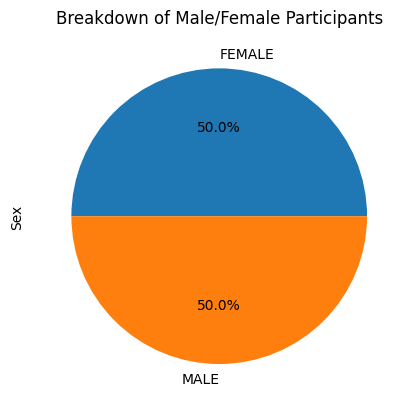

In [43]:
male_female_counts.plot.pie(title="Breakdown of Male/Female Participants", autopct='%1.1f%%')

In [44]:
# The above steps were broken down but could be done in one line:
# df.groupby("Sex")["Sex"].count().plot.pie(title="Breakdown of Male/Female Participants", autopct='%1.1f%%')

### Distribution of Age (Bar Chart / Histogram)

We can see the maximum, minimum, and mean age for participants:

In [46]:
min_age = df["Age"].min()
max_age = df["Age"].max()
mean_age = round(df["Age"].mean(), 2)  # rounded to 2 decimal places

# Print out a sentence summarizing this:
print(f"""The minimum age of participants was {min_age}, \
the maximum was {max_age} and the mean was {mean_age}.""")

The minimum age of participants was 18, the maximum was 22 and the mean was 19.54.


Let's plot the Age distribution. Pandas does have a `hist()` method that would plot a histogram, but getting the expected visual it would be slightly complicated in this case. Instead, we can use a simple bar graph. We can get the value counts (not sorted by frequency) and then plot them in a bar graph. We'll also use the mean from above in the title.

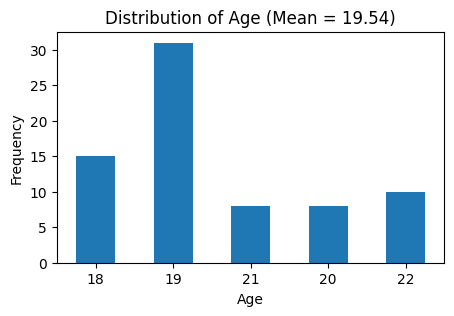

In [47]:
df["Age"].value_counts(sort=False).plot.bar(
    title=f"Distribution of Age (Mean = {mean_age})",
    xlabel="Age",        # label the x-axis
    ylabel="Frequency",  # label the y-axis
    rot=0,               # rotate the x-axis labels
    figsize=(5,3),
);

### Male/Female Breakdown by Age (Stacked Bar Chart)

Next, let's breakdown the age of participants by Sex.

In [48]:
# Make a group using two columns
# select the Age column
# then and do a count (aggregate)
sex_age_series = df.groupby(["Sex", "Age"])["Age"].count()
sex_age_series

Sex     Age
FEMALE  18      2
        19     15
        20      6
        21      4
        22      9
MALE    18     13
        19     16
        20      2
        21      4
        22      1
Name: Age, dtype: int64

In [49]:
# The result from above is a Series with a special index called a MultiIndex
# We need to unstack the series from above
# The unstack() method reshapes the Series
# The result is something like doing a pivot and will be a DataFrame
sex_age_df = sex_age_series.unstack()
sex_age_df

Age,18,19,20,21,22
Sex,,,,,
FEMALE,2,15,6,4,9
MALE,13,16,2,4,1


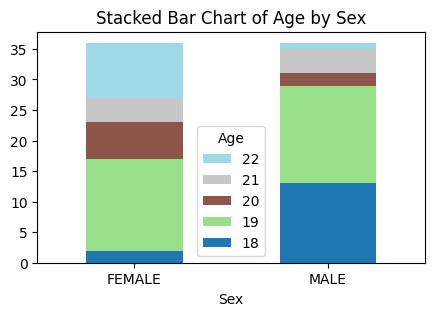

In [50]:
# Plot the bar graph, indicating that it should be stacked
sex_age_df.plot.bar(
    stacked=True,
    title="Stacked Bar Chart of Age by Sex",
    xlabel="Sex",
    legend="reverse",
    rot=0,
    colormap="tab20",
    figsize=(5,3),
    );

### Favorite Pizza Topping (as a Word Cloud)

We will do one special kind of visualization (a wordcloud) with another library called `wordcloud`. 

If you don't have the library installed, you can install it with the command `pip install wordcloud`. 

In [51]:
from wordcloud import WordCloud

We also need to use the `matplotlib` library to show the image. Pandas actually uses this library under the hood for all of the plots.

In [52]:
import matplotlib.pyplot as plt

In [55]:
# We need a python dictionary of the value_counts
words = df["favorite_topping_pre"].value_counts().to_dict()
words

{'ONIONS': 10,
 'OLIVES': 9,
 'GREEN PEPPERS': 9,
 'CHICKEN': 9,
 'BACON': 9,
 'PEPPERONI': 8,
 'SAUSAGE': 8,
 'MUSHROOMS': 6,
 'PINEAPPLE': 4}

In [56]:
# Make the wordcloud
wordcloud = WordCloud(
    background_color="white"
    ).generate_from_frequencies(words)

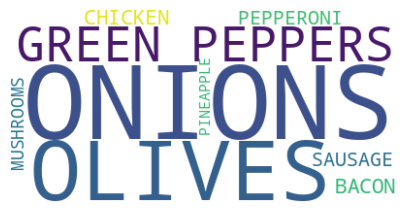

In [57]:
# Use the matplotlib library to show the image
plt.figure(figsize=(5,3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analysis 2: Pre vs. Post Data

Let's see the difference between pre and post variables. 

### Comparing Pre-Post Scores (Box Plot)

Let's see if how the participants faired with the test by using a box plot to visually compare the test scores.

In [58]:
# First we'll select and multiply the score columns
# (They are in float / percent format)
scores = df[["score_pre", "score_post"]] * 100

# We'll also rename the columns
scores.columns = ["Pre-Test Scores", "Post-Test Scores"]

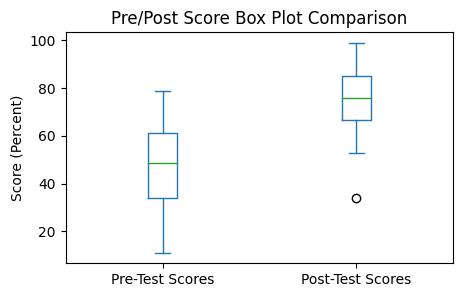

In [59]:
# Make a box plot
scores.plot.box(
    title="Pre/Post Score Box Plot Comparison",
    ylabel="Score (Percent)",
    figsize=(5,3)
);

###  Motivation and Confidence Pre/Post Comparison (Box Plots)

Next, let's see if there was an affect on the motivation and confidence of participants after exposure to the pizza material. The process is the same as the above.

In [60]:
# Select the columns we want to use (this will make a new dataframe we can use)
mot_conf_df = df[[
     "motivation_pre",
     "motivation_post",
     "confidence_pre",
     "confidence_post"
    ]]

# Rename the columns
mot_conf_df.columns = [
    "Motivation (Pre)", 
    "Motivation (Post)", 
    "Confidence (Pre)", 
    "Confidence (Post)"
]

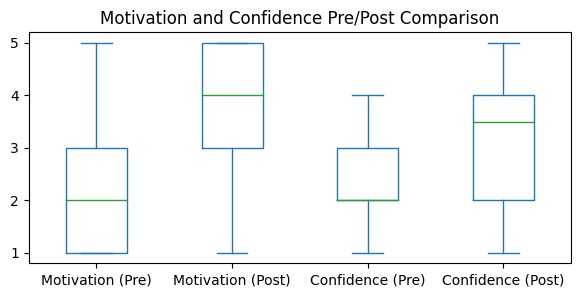

In [61]:
# Plot it with a title and specify the y ticks
mot_conf_df.plot.box(
    title="Motivation and Confidence Pre/Post Comparison",
    yticks=[1,2,3,4,5],
    figsize=(7,3)
);

## Analysis 3: Number of Hours Correlated with Motivation

We could see that there was some affect that the pizza material had on the participants. Let's visualize the correlation between the hours spent on the pizza material and the impact on motivation. 

First we'll make a new column indicating the motivation change.

Then we'll make a scatterplot where `x` and `y` are the dataframe columns to use.

In [62]:
df["motivation_change"] = df["motivation_post"] - df["motivation_pre"]

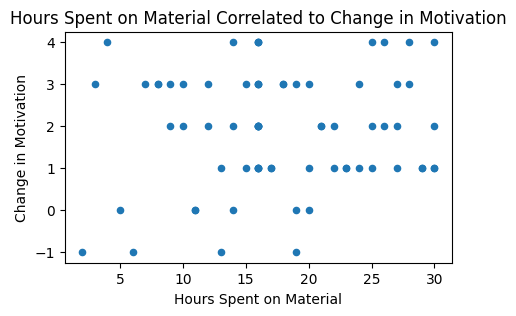

In [63]:
df.plot.scatter(
    x="hrs_pzmat",
    y="motivation_change",
    title="Hours Spent on Material Correlated to Change in Motivation",
    xlabel="Hours Spent on Material",
    ylabel="Change in Motivation",
    figsize=(5,3),
);

## Analysis 4: Post-Favorite Pizza Topping

Obviously the best indication that the pizza material was successful is found by analyzing the participants' favorite pizza topping after they had exposure to the material. We can generate a wordcloud again. This is the best way, very scientific.

In [64]:
# We need a python dictionary of the value_counts
words = df["favorite_topping_post"].value_counts().to_dict()

# Make the wordcloud
wordcloud = WordCloud(
    background_color="white"
).generate_from_frequencies(words)

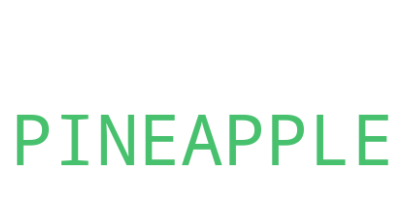

In [65]:
# Use the matplotlib library to show the image
plt.figure(figsize=(5,3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Research Conclusion

100% of participants indicated that Pineapple was their favorite topping post-material exposure. Therefore treatment of pizza material was 100% effective.

# Resources

There are a large number of resources here and a massive number of resources online. Most of the resources below are free to access.

Note that you do not need to be a master at python in order to get started using it for data analysis. It may be enough to learn some python basics and then piece together the things you need to to data analysis.

Remember this: one of the greatest resources is the **documentation**.

## Try it out!

If you would like to try out Jupyter in the browser without the need to install anything on your computer, you can get started with these websites:

- [JupyterLite](https://jupyterlite.github.io/demo/lab/index.html) - Try a lite version of Jupyter Notebook in your browser.
- [Google Colab](https://colab.research.google.com/) - Colab, or "Colaboratory", allows you to write and execute Python in your browser, with zero configuration required, access to GPUs free of charge, easy sharing.


## Installation

It's not possible to write down the steps to installation here for your specific machine. Please see documentation and/or check online for installation steps if you get stuck. Here are some general links:

- [Installing Python](https://www.python.org/downloads/)
- [Installing Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html)
- [Installing Jupyter Lab (Notebook)](https://jupyter.org/install)
- Rather than trying to manage installing many tools separately, you could use [Anaconda](https://www.anaconda.com/download)



## Learning

There are a lot of amazing resources to help you learn python and pandas and some related tools. Here are some things to get you started, in no particular order:

- [100 Days of Code: The Complete Python Pro Bootcamp for 2023 (Udemy - Dr. Angela Yu)](https://www.udemy.com/course/100-days-of-code/) - 100 Days, 1 hour per day, learn to build 1 project per day. At 60+ hours of content, this Python course is an extremely comprehensive Python course. Even if you have zero programming experience, this course will help you be a proficient Python programmer. You will build projects like a Pong Game, Auto Swipe on Tinder, Analyze Lego Datasets, and more.
- [Python for Everybody (Dr. Charles Severance)](https://www.py4e.com/) - A course based on the book, "Python for Everybody", by University of Michigan's Dr. Charles Severance. The book has been turned into a free course on various platforms like Coursera, EdX, and FreeCodeCamp with videos made by Dr. Severance himself. It covers the fundamentals of Python programming, web development, data visualization, and basic data analysis with Python. 
- [Python Beginners Guide (for those with experience programming)](https://wiki.python.org/moin/BeginnersGuide/Programmers) - Big list of resources, tutorials, and courses.
- [Python Beginners Guide (no programming experience)](https://wiki.python.org/moin/BeginnersGuide/NonProgrammers) - Big list of resources, tutorials, books, and etc.
- The official [Python Tutorial](https://docs.python.org/3/tutorial/index.html) - A must.
- [Pandas Getting Started Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)
- [Scientific Computing with Python Certification](https://www.freecodecamp.org/learn/scientific-computing-with-python/) - Free Certificate course from FreeCodeCamp
- [Data Analysis with Python Certification](https://www.freecodecamp.org/learn/data-analysis-with-python/) - Free certificate course from FreeCodeCamp
- [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Visual Guide to Pandas](https://betterprogramming.pub/pandas-illustrated-the-definitive-visual-guide-to-pandas-c31fa921a43)
- [Pandas CheatSheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Pandas Exercises](https://github.com/guipsamora/pandas_exercises) - A repository with jupyter notebooks to practice data analysis skills using pandas.
- [PythonData](https://github.com/yunuserbas/PythonData) - This is the Data Analysis Repository using Python to practice data coding, cleaning, manipulation, and visualization, including python libraries such as Numpy, Pandas, Matplotlib, and Seaborn.
- [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html) - Some tutorials and guides for matplotlib.
- [Think Stats 2nd Edition](https://greenteapress.com/wp/think-stats-2e/) - an introduction to Probability and Statistics for Python programmers. (Has a free PDF)
- [Data Analysis with Python 3rd Edition](https://wesmckinney.com/book/) - Great resource you can read online for free.
- [Learn Python with Jypyter](https://learnpythonwithjupyter.com/assets/book/learn_python_with_jupyter.pdf) (Free PDF Book)
- [datawars.io](https://www.datawars.io) - Practice Data Science with Real Life Projects
- [Markdown Guide](https://www.markdownguide.org) - Learn how to write in markdown (this simple syntax is used in Jupyter Notebook 'Markdown' cells). It's not a must, but incredibly useful!
- [The Ultimate Markdown Guide for Jupyter Notebook](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) - Jupyter Notebooks have a lot more than standard markdown. This shows you what is possible.

## More Resources

Some people work hard at curating awesome resources - here are some of those collections:

- [Awesome Python](https://github.com/vinta/awesome-python) - A curated list of awesome Python frameworks, libraries, software and resources
- [Awesome Pandas](https://github.com/tommyod/awesome-pandas) - A collection of resources for pandas and related subjects
- [Awesome Jupyter](https://github.com/markusschanta/awesome-jupyter) - A curated list of resources related to Jupyter Notebooks
- [Python Graph Gallery](https://python-graph-gallery.com) - **GREAT** resource to see code example for all kinds of graphs
- [Python Cheatsheet](https://gto76.github.io/python-cheatsheet/)


## Related Libraries for Data Analysis and Visualization

If you want to take your data analysis game to the next level, be sure to check out some of these:

- [seaborn](https://seaborn.pydata.org) - a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- [polars](https://www.pola.rs) - Lightning-fast DataFrame library for Rust and Python (alternative to Pandas)
- [matplotlib](https://matplotlib.org/stable/) - Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
- [plotly](https://plotly.com/python/) - make interactive, publication-quality graphs
- [bokeh](https://bokeh.org) - a Python library for creating interactive visualizations for modern web browsers


## Publishing Jupyter Notebooks

- [quarto](https://quarto.org/) - An open-source scientific and technical publishing system. Publish reproducible, production quality articles, presentations, websites, blogs, and books in HTML, PDF, MS Word, ePub, and more. 
- [Jupyter Book](https://jupyterbook.org/en/stable/intro.html) - Build beautiful, publication-quality books and documents from computational content. (This is part of the Executable Books project found at https://executablebooks.org/en/latest/)


## Create Dashboards or Webapps

- [Voilà](https://voila.readthedocs.io/en/stable/) - Voilà turns Jupyter notebooks into standalone web applications.
- [Mercury](https://runmercury.com) - Turn your Python Notebook into a Web App with the open-source Mercury framework. Share your results with non-technical users.
- [streamlit](https://streamlit.io) - Streamlit turns data scripts into shareable web apps in minutes. All in pure Python. No front‑end experience required.
- [pygwalker](https://docs.kanaries.net/pygwalker) - PyGWalker (opens in a new tab) can simplify your Jupyter Notebook data analysis and data visualization workflow, by turning your pandas dataframe (and polars dataframe) into a Tableau-style User Interface for visual exploration.

# Appendix 1: Testing

One of the benefits of using a programming language to wrangle and analyze your dataset is that you can create tests in order to ensure that your data has the expected values.

Imagine some of the following scenarios:
    
1. You collaborate with several other Professors and you need a way to combine all of the data and then verify that it is both uniform and within the parameters.
2. You set up your data cleaning code *before* you receive datasets from collaboraters. Testing that your cleaning code matches certain parameters will ensure the quality of your overall dataset.
2. You have provided participants with a form that requires them to write something. Manual input can result in a great number of inconsistencies and errors.
3. You have a huge amount of data. Browsing through it to ensure that values are within certain parameters is prone to error.

Python has an `assert` keyword that checks if something is **True** or **False**. If it is **True** the check passes. **False** will actually result in the program giving an error. Normally that means the process would exit with an error. Within a Jupyter notebook you will see error output.

We can use `assert` to ensure that our datasets have values that fit within certain parameters.

Let's see an example of how to apply a test to a DataFrame column.

First we will make a mask. The hours spent on pizza material should be between 0 and 50, so the mask will be the inversion of that. We want to see anything in the DataFrame that has less than 0 OR more than 50 hours. Note that the pipe character `|` means OR.

In [66]:
mask = (df["hrs_pzmat"] < 0) | (df["hrs_pzmat"] > 50)

If we apply this mask to our DataFrame we can check the length using `len()` function. The length of the DataFrame is how many rows it has.

In [67]:
out_of_range = len(df[mask])

Now we assert that there are no rows out of range. Notice that we can provide a custom message that would be printed out if the assertion doesn't pass. If the assertion is `True`, nothing will actually happen and that is desired.

In [68]:
assert out_of_range == 0, "There are values in 'hrs_pzmat' that are out of range"

In [69]:
#This could be done with one line of code:
    
assert len(df[(df["hrs_pzmat"] < 0) | (df["hrs_pzmat"] > 50)]) == 0, "There are values in 'hrs_pzmat' that are out of range"

An interesting practical application of this kind of testing would be to write a function that tests for certain parameters. If the function was defined at the beginning of your notebook you could then use it throughout the notebook to test your progress as you wrangle data.

Here's an example:

In [70]:
def run_tests(df):
    assert len(df[(df["hrs_pzmat"] < 0) | (df["hrs_pzmat"] > 50)]) == 0, "There are values in 'hrs_pzmat' that are out of range"
    # other tests
    
run_tests(df)

# Appendix 2: Saving a Figure (plot) to File

To save a figure to file, there are few steps needed. One thing that is required is matplotlib's `pyplot` module. Usually people use an alias of `plt` for it:

In [71]:
import matplotlib.pyplot as plt

<div class="alert alert-block alert-warning">
    <b>Note:</b> If you are making a notebook, it's best to include <i>all</i> imports at the start of the notebook.
</div>

Next, we will need to make a `figure` and `axes` and assign them to variables. This will result in an empty figure. 

The behavior of `plt` is slightly different than what you might expect. After we make the figure and axes and then call `plt.show()` we can't use this same figure in another cell. So it's best to do this in one cell.

When we use the `plot()` method(s) in pandas, we can specify the axes to plot it to.

At the end we will save the figure with the `savefig()` method which requires a file name:

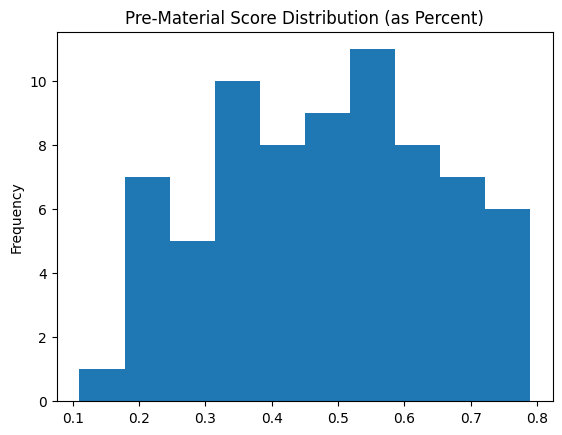

In [72]:
# Make a figure and axes
fig, ax = plt.subplots()

# plot the scores
df["score_pre"].plot.hist(
    ax=ax, 
    title="Pre-Material Score Distribution (as Percent)", 
    )

# Save the figure
# This will also show it in the notebook
# The filename we will use is figure01.png
# This will be saved in the current directory
plt.savefig("figure01.png")

The default format for `savefig()` is **png** regardless of what filename you use. See the [savefig documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) for more options.

# Appendix 3: Customizing a Figure

You may want to customize a figure in some ways. Let's first make a simple bar graph that compares the mean hours spent on pizza material between males and females. It's debatable how useful such a bar graph could be, but for demonstration purposes it works.

<AxesSubplot: xlabel='Sex'>

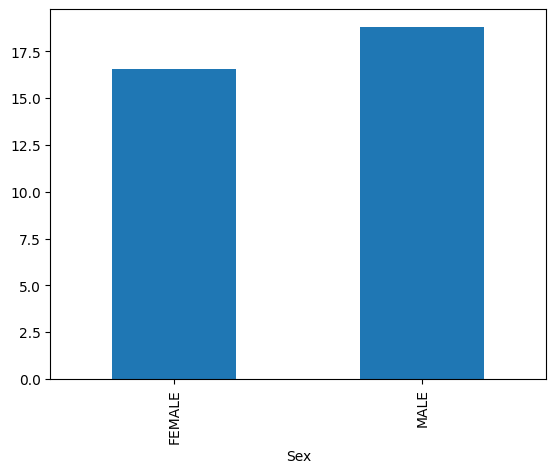

In [88]:
df.groupby("Sex")["hrs_pzmat"].mean().plot.bar()

Great! But, it's somewhat difficult to make out what the actual numbers are. It would be great to have some labels. It may also be useful to have a horizontal line indicating the mean hours spent on material for all participants. If we want to be really picky, the labels on the x-axis should be horizontal, and we really should use some different colors for the bars.

Some of the customizations we want to apply can be done using only pandas, but going further requires using **matplotlib**, and specifically it's **pyplot** module. As mentioned previously, this is the library that pandas uses under the hood to generate figures.

It may be helpful to imagine the above figure as a 2D canvas with a horizontal (x) and vertical (y) axis. To add something to the canvas, we would need to specify *where* it should go. A canvas with a size of 2x2 would have a center spot of x=1 and y=1.

Now also consider that a figure has objects on it such as x and y axis labels, lines, and in the case of the above example, two bars. 

Why does that matter? With code **we are able to access and manipulate the properties of all of the objects of the figure programatically.** For example, we can get the dimensions of the MALE bar in the above figure. We would need these if we want to add a label in the middle of that bar.

The below code utilizes these kind of properties to customize the figure:

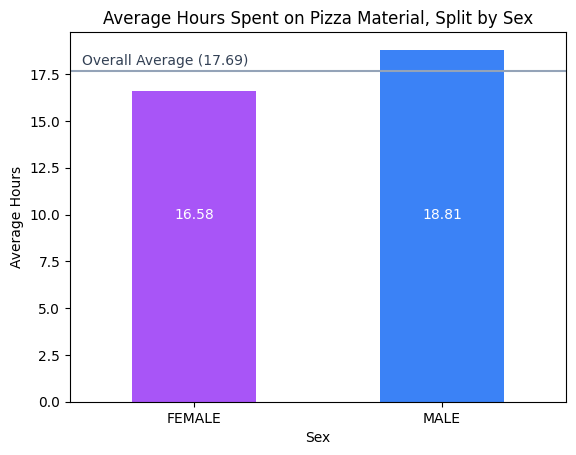

In [89]:
# We need to use matplotlib.pyplot for this
import matplotlib.pyplot as plt

# Make a figure and axes
fig, ax = plt.subplots()

# Use some different colors for male/female
colors = ["#a855f7", "#3b82f6"]

# plot the bar graph and assign the axes to use
title = "Average Hours Spent on Pizza Material, Split by Sex"
df.groupby("Sex")["hrs_pzmat"].mean().plot.bar(
    ax=ax,
    title=title,
    ylabel="Average Hours",
    color=colors,
    rot=0,
    )

# Iterate through each bar (patch) and annotate it
for patch in ax.patches:
    
    # Get the actual value for the bar
    value = round(patch.get_height(), 2)
    
    # Get the x and y coordinates for the annotation
    # based on the geometry of the bar
    # we'll make them vertically aligned at 10
    x_coord = patch.get_x() + patch.get_width() / 2
    y_coord = 10
    
    # Apply an annotation
    ax.annotate(
        str(value),
        (x_coord, y_coord),
        ha="center",
        va="center",
        color="white"
    )

# Add a horizontal line to the axes
hrs_mean = df["hrs_pzmat"].mean()
ax.axhline(y=hrs_mean, color="#94a3b8", linestyle="-")

# Add some text just above the hrs_mean line
ax.text(
    -0.45, hrs_mean + 0.3,
    f"Overall Average ({round(hrs_mean, 2)})",
    color="#334155"
    )

# Show the figure
plt.show()